# 分省指标数据之使用与制图
* 数据处理+制图 使用[pandas](http://pandas.pydata.org/pandas-docs/stable/install.html)
* 制图 使用 [bokeh](http://bokeh.pydata.org/en/latest/docs/installation.html)

## (1) 取/连结 数据

In [121]:
import pandas as pd   # 数据分析模块 （Python Data Analysis Library Python）

In [122]:
# 列出同目录之.csv档以检查
import glob
print(glob.glob("*.csv"))

['fsnd_GDP_A020101.csv', 'fsnd_POP_A030101.csv', 'gongshui.csv', 'pop.csv']


In [123]:
# 第1次尝试 
# 读GDP数据，赋与df   (df指 dataframe)   pd.DataFrame 是前面最早调用的 pandas
df_try = pd.read_table("gongshui.csv",   # 档名
                          encoding='utf8', # 编码
                      )
# 出错的话，是国家数据网下载的数据并没有用 UTF-8 (档首无BOM)编码
# 使用Notepad++按编码-->  转换至  UTF-8 (档首无BOM)编码

In [124]:
# 看看有什麽？
df_try

,数据库：分省年度数据
0,指标：水资源总量(亿立方米)
1,时间：最近10年
2,"地区,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2..."
3,"北京市,26.80,20.30,24.81,39.50,26.81,23.10,21.84,..."
4,"天津市,12.80,11.37,14.64,32.94,15.39,9.20,15.24,1..."
5,"河北省,135.10,106.16,175.86,235.53,157.15,138.90,..."
6,"山西省,94.00,111.01,126.55,106.25,124.34,91.50,85..."
7,"内蒙古自治区,537.00,537.79,959.81,510.25,419.00,388...."
8,"辽宁省,179.00,145.93,463.17,547.30,294.79,606.70,..."
9,"吉林省,331.30,306.03,607.40,460.47,315.89,686.70,..."


In [125]:
# 第2次尝试 
# 指定数据标题为原始数据之第几行
df    = pd.read_table("gongshui.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3               # 指定数据的标题为原始数据之第3行
                     )
df

,"地区,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年"
0,"北京市,26.80,20.30,24.81,39.50,26.81,23.10,21.84,..."
1,"天津市,12.80,11.37,14.64,32.94,15.39,9.20,15.24,1..."
2,"河北省,135.10,106.16,175.86,235.53,157.15,138.90,..."
3,"山西省,94.00,111.01,126.55,106.25,124.34,91.50,85..."
4,"内蒙古自治区,537.00,537.79,959.81,510.25,419.00,388...."
5,"辽宁省,179.00,145.93,463.17,547.30,294.79,606.70,..."
6,"吉林省,331.30,306.03,607.40,460.47,315.89,686.70,..."
7,"黑龙江省,814.10,944.34,1419.58,841.41,629.48,853.5..."
8,"上海市,64.10,47.15,28.03,33.90,20.72,36.80,41.57,..."
9,"江苏省,582.10,399.34,283.53,373.33,492.40,383.50,..."


In [126]:
# 第3次尝试
# 使用skiprows 跳过上面的最後2行
df    = pd.read_table("gongshui.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3,              # 指定数据的标题为原始数据之第3行
                       skiprows = [35,36]       # 原始数据之第35, 36行跳过不计
                     )
df

,"地区,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年"
0,"北京市,26.80,20.30,24.81,39.50,26.81,23.10,21.84,..."
1,"天津市,12.80,11.37,14.64,32.94,15.39,9.20,15.24,1..."
2,"河北省,135.10,106.16,175.86,235.53,157.15,138.90,..."
3,"山西省,94.00,111.01,126.55,106.25,124.34,91.50,85..."
4,"内蒙古自治区,537.00,537.79,959.81,510.25,419.00,388...."
5,"辽宁省,179.00,145.93,463.17,547.30,294.79,606.70,..."
6,"吉林省,331.30,306.03,607.40,460.47,315.89,686.70,..."
7,"黑龙江省,814.10,944.34,1419.58,841.41,629.48,853.5..."
8,"上海市,64.10,47.15,28.03,33.90,20.72,36.80,41.57,..."
9,"江苏省,582.10,399.34,283.53,373.33,492.40,383.50,..."


In [127]:
# 第4次尝试
# 分隔符改设
df    = pd.read_table("gongshui.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3,              # 指定数据的标题为原始数据之第3行
                       skiprows = [35,36],      # 原始数据之第35, 36行跳过不计
                       sep =','                 # 分隔符设为',' read_table内置分隔符为\t
                     )
df

,地区,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年
0,北京市,26.8,20.30,24.81,39.50,26.81,23.1,21.84,34.2,23.81,22.07
1,天津市,12.8,11.37,14.64,32.94,15.39,9.2,15.24,18.3,11.31,10.11
2,河北省,135.1,106.16,175.86,235.53,157.15,138.9,141.16,161.0,119.79,107.34
3,山西省,94.0,111.01,126.55,106.25,124.34,91.5,85.76,87.4,103.40,88.52
4,内蒙古自治区,537.0,537.79,959.81,510.25,419.00,388.5,378.15,412.1,295.86,411.29
5,辽宁省,179.0,145.93,463.17,547.30,294.79,606.7,170.96,266.0,261.72,261.36
6,吉林省,331.3,306.03,607.40,460.47,315.89,686.7,298.04,332.0,346.04,353.63
7,黑龙江省,814.1,944.34,1419.58,841.41,629.48,853.5,989.61,462.0,491.85,727.93
8,上海市,64.1,47.15,28.03,33.90,20.72,36.8,41.57,37.0,34.50,27.64
9,江苏省,582.1,399.34,283.53,373.33,492.40,383.5,400.31,378.0,495.71,404.40


In [128]:
# .head()只看前面5笔
df.head()

,地区,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年
0,北京市,26.8,20.30,24.81,39.50,26.81,23.1,21.84,34.2,23.81,22.07
1,天津市,12.8,11.37,14.64,32.94,15.39,9.2,15.24,18.3,11.31,10.11
2,河北省,135.1,106.16,175.86,235.53,157.15,138.9,141.16,161.0,119.79,107.34
3,山西省,94.0,111.01,126.55,106.25,124.34,91.5,85.76,87.4,103.40,88.52
4,内蒙古自治区,537.0,537.79,959.81,510.25,419.00,388.5,378.15,412.1,295.86,411.29


In [129]:
# 小结：要处理数据得看原始数据的格式好不好处理
# 现在读2个数据，分别放在df_GDP及df_POP
df_gongshui= pd.read_table("gongshui.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3,              # 指定数据的标题为原始数据之第3行
                       skiprows = [35,36],      # 原始数据之第35, 36行跳过不计
                       sep =','                 # 分隔符设为',' read_table内置分隔符为\t
                      )
df_POP= pd.read_table("pop.csv",   # 档名
                       encoding = 'utf8',       # 编码
                       header = 3,              # 指定数据的标题为原始数据之第3行
                       skiprows = [35,36],      # 原始数据之第35, 36行跳过不计
                       sep =','                 # 分隔符设为',' read_table内置分隔符为\t
                      )


## (2) 准备 数据  （型态）
* 此练习目标在於取最新一年的数据
* 比较这两指标数据是否有关连性
* i.e. 人口较多是否和产值较多相关连

In [130]:
# 先处理 df_GDP
df = df_gongshui

In [131]:
# 目前之columns列
df.columns

Index(['地区', '2015年', '2014年', '2013年', '2012年', '2011年', '2010年', '2009年',
       '2008年', '2007年', '2006年'],
      dtype='object')

In [132]:
# 目前之index 索引(栏)
df.index

RangeIndex(start=0, stop=31, step=1)

In [133]:
df['地区'].head()

0       北京市
1       天津市
2       河北省
3       山西省
4    内蒙古自治区
Name: 地区, dtype: object

In [134]:
# 此写法不行，不能以数字开头 
df.2007年

SyntaxError: invalid syntax (<ipython-input-134-636ec1e109bc>, line 2)

In [135]:
# 此写法可以
df['2007年'].head()

0     23.81
1     11.31
2    119.79
3    103.40
4    295.86
Name: 2007年, dtype: float64

In [136]:
# 数据型态dtypes 
df.dtypes

地区        object
2015年    float64
2014年    float64
2013年    float64
2012年    float64
2011年    float64
2010年    float64
2009年    float64
2008年    float64
2007年    float64
2006年    float64
dtype: object

In [137]:
# 把df 的栏位用列表推导的方式清理掉'年'这个字符後转换成整数
df.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df.columns]
df.columns

Index(['地区', 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006], dtype='object')

In [138]:
# 求最新的一年
years = [ x for x in df.columns if x!='地区'] 
max(years)

2015

In [139]:
# pd.melt() 相当於Tableau 的数据透视
df_melted = pd.melt(df, id_vars=['地区'], value_vars=years)

In [140]:
df_melted.columns

Index(['地区', 'variable', 'value'], dtype='object')

In [141]:
df_melted.columns = ['地区', '年', 'gongshui']
df_melted

,地区,年,gongshui
0,北京市,2015,26.80
1,天津市,2015,12.80
2,河北省,2015,135.10
3,山西省,2015,94.00
4,内蒙古自治区,2015,537.00
5,辽宁省,2015,179.00
6,吉林省,2015,331.30
7,黑龙江省,2015,814.10
8,上海市,2015,64.10
9,江苏省,2015,582.10


In [142]:
df_gongshui_done = df_melted


In [143]:
# 再处理 df_POP
df = df_POP
df.columns = [ int(x.replace('年','')) if x!='地区' else x for x in df.columns]
years = [ x for x in df.columns if x!='地区'] 
df_melted = pd.melt(df, id_vars=['地区'], value_vars=years)
df_melted.columns = ['地区', '年', 'POP']
df_POP_done = df_melted
df_POP_done

,地区,年,POP
0,北京市,2015,2171
1,天津市,2015,1547
2,河北省,2015,7425
3,山西省,2015,3664
4,内蒙古自治区,2015,2511
5,辽宁省,2015,4382
6,吉林省,2015,2753
7,黑龙江省,2015,3812
8,上海市,2015,2415
9,江苏省,2015,7976


## (3) 连结两个数据

In [147]:
df_p = df_POP_done.join(df_gongshui_done,lsuffix='', rsuffix='_gongshui')
df_p

,地区,年,POP,地区_gongshui,年_gongshui,gongshui
0,北京市,2015,2171,北京市,2015,26.80
1,天津市,2015,1547,天津市,2015,12.80
2,河北省,2015,7425,河北省,2015,135.10
3,山西省,2015,3664,山西省,2015,94.00
4,内蒙古自治区,2015,2511,内蒙古自治区,2015,537.00
5,辽宁省,2015,4382,辽宁省,2015,179.00
6,吉林省,2015,2753,吉林省,2015,331.30
7,黑龙江省,2015,3812,黑龙江省,2015,814.10
8,上海市,2015,2415,上海市,2015,64.10
9,江苏省,2015,7976,江苏省,2015,582.10


In [148]:
df_p.drop(["地区_gongshui","年_gongshui"], axis=1)

,地区,年,POP,gongshui
0,北京市,2015,2171,26.80
1,天津市,2015,1547,12.80
2,河北省,2015,7425,135.10
3,山西省,2015,3664,94.00
4,内蒙古自治区,2015,2511,537.00
5,辽宁省,2015,4382,179.00
6,吉林省,2015,2753,331.30
7,黑龙江省,2015,3812,814.10
8,上海市,2015,2415,64.10
9,江苏省,2015,7976,582.10


In [149]:
df_p.drop(["地区_gongshui","年_gongshui"], axis=1).set_index(["地区","年"])

,,POP,gongshui
地区,年,,
北京市,2015,2171,26.80
天津市,2015,1547,12.80
河北省,2015,7425,135.10
山西省,2015,3664,94.00
内蒙古自治区,2015,2511,537.00
辽宁省,2015,4382,179.00
吉林省,2015,2753,331.30
黑龙江省,2015,3812,814.10
上海市,2015,2415,64.10


In [150]:
df_pp = df_p.drop(["地区_gongshui","年_gongshui"], axis=1).set_index(["地区","年"])

In [151]:
df_pp.query("年==2015")

,,POP,gongshui
地区,年,,
北京市,2015,2171,26.8
天津市,2015,1547,12.8
河北省,2015,7425,135.1
山西省,2015,3664,94.0
内蒙古自治区,2015,2511,537.0
辽宁省,2015,4382,179.0
吉林省,2015,2753,331.3
黑龙江省,2015,3812,814.1
上海市,2015,2415,64.1


## (4) 可视化 使用pands 自带的plot来制图

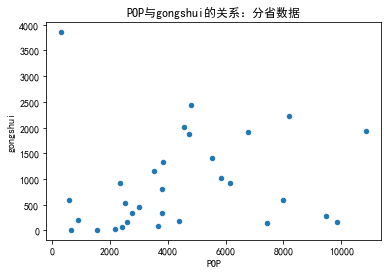

In [152]:
%matplotlib inline
df_pp.query("年==2015").plot(kind='scatter', x='POP', y='gongshui', 
          title = 'POP与gongshui的关系：分省数据')

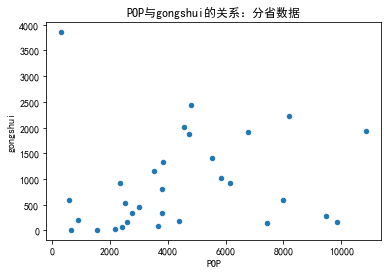

In [153]:
# 解决中文乱码问题
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

df_plot = df_pp.query("年==2015")
df_plot.plot(kind='scatter', x='POP', y='gongshui', 
          title = 'POP与gongshui的关系：分省数据')

## (5) 用 numpy.polyfit 做线性回归

In [155]:
# Regression Using Pandas and Statsmodels
import numpy as np
fit = np.polyfit(x=df_pp.query("年==2015")['POP'], y=df_pp.query("年==2015")['gongshui'], deg=1)

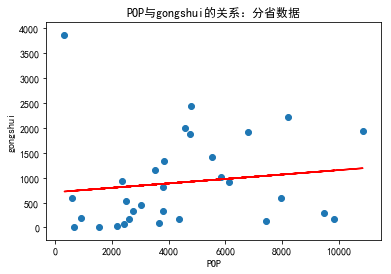

In [156]:
x=df_plot['POP']
y=df_plot['gongshui']
ax = df_plot.plot(kind='scatter', x='POP', y='gongshui', 
          title = 'POP与gongshui的关系：分省数据')
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

## (6) 可视化 使用bokeh 来制图，可交互（HoverTool tooltip）

In [157]:
df_pp 

,,POP,gongshui
地区,年,,
北京市,2015,2171,26.80
天津市,2015,1547,12.80
河北省,2015,7425,135.10
山西省,2015,3664,94.00
内蒙古自治区,2015,2511,537.00
辽宁省,2015,4382,179.00
吉林省,2015,2753,331.30
黑龙江省,2015,3812,814.10
上海市,2015,2415,64.10


In [158]:
# tooltip 工具提示 
df_pp['desc'] = df_pp.index.get_level_values(0)

In [159]:
# 制图
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import HoverTool, BoxSelectTool

title = '分省数据' 
xlabel = 'POP：人口' 
ylabel = 'gongshui：供水'

hover = HoverTool(
    tooltips=[
        ( '人口',  '$x{0,F}'), 
        ( '产值',  '$y{0,F}'),
        ( '地区',  '@desc'  ),
    ]
)

TOOLS = [hover, "pan, wheel_zoom, box_zoom, reset, resize"]
fig = figure(plot_width=800, plot_height=600,
           x_axis_label = xlabel, y_axis_label = ylabel, 
           title=title, tools=TOOLS)

df_plot = df_pp.query("年==2015")

fig.circle("POP", "gongshui",
         source = df_plot,
         fill_alpha=0.6, line_color=None, size= 30)

#regression line
xs = [min(df_plot["POP"]), max(df_plot["POP"])]
fig.line(x=xs, y=[ fit[0] * x + fit[1] for x in xs] )

output_notebook() # 输出到IPython/Jupyter Notebook，若要输出到他处需调整
#output_file('by_provinces.htm') # 输出到 htm
show(fig)


Loading BokehJS ...

In [160]:
## (7) 可视化 使用bokeh 来制图，可交互（slider）

In [161]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import CustomJS, Slider,HoverTool, BoxSelectTool
from bokeh.layouts import column

title = '分省数据' 
xlabel = 'POP：人口大小' 
ylabel = 'gongshui：供水总量'
hover = HoverTool(
    tooltips=[
        ( '人口大小',  '$x{0,F}'), 
        ( '产值大小',  '$y{0,F}'),
        ( '地区',  '@desc'  ),
    ]
)

TOOLS = [hover, "pan, wheel_zoom, box_zoom, reset, resize"]

fig = figure(plot_width=800, plot_height=600,
           x_axis_label = xlabel, y_axis_label = ylabel, 
           title=title, tools=TOOLS)

yr_min = df_pp.index.get_level_values(1).min()
df_plot = df_pp.query("年=={yr}".format(yr=yr_min))
plt = fig.circle("POP", "GDP",
         source = df_plot,
         fill_alpha=0.6, line_color=None, size= 15)


def update_plot(year):
    #plt.data_source.data = df_pp.query("年=={yr}".format(yr=year))
    plt.data_source.data['POP'] = list(df_pp.query("年=={yr}".format(yr=year)).loc[:,['POP']].iloc[:,0].values)
    plt.data_source.data['gongshui'] = list(df_pp.query("年=={yr}".format(yr=year)).loc[:,['gongshui']].iloc[:,0].values)
    plt.data_source.data['地区_年'] = [(x[0],int(year)) for x in plt.data_source.data['地区_年']]

    push_notebook(handle=bokeh_handle)  
    print (year)
    ##### new notebook cell #####

callback = CustomJS(code="""
if (IPython.notebook.kernel !== undefined) {
    var kernel = IPython.notebook.kernel;
    cmd = "update_plot(" + cb_obj.value + ")";
    kernel.execute(cmd, {}, {});
}
""")

slider = Slider(start=df_pp.index.get_level_values(1).min(), 
                end=df_pp.index.get_level_values(1).max(),
                value=1,
                step=1,
                title="年",
                callback=callback)
output_notebook()

bokeh_handle = show(column(slider, fig), notebook_handle=True)

Loading BokehJS ...

## (8). 算线性期待产值来求哪些省低於期待


In [78]:
yr = 2015
df_plot = df_pp.query("年=={yr}".format(yr=yr_min))
# Regression Using Pandas and Statsmodels
fit = np.polyfit(x=df_plot['POP'], 
                 y=df_plot['GDP'], deg=1)

In [79]:
df_plot['expected'] =  [ fit[0] * x + fit[1] for x in df_plot['POP']] 
df_plot['difference'] =  df_plot['GDP'] - df_plot['expected']
df_plot['difference_ratio'] = ( df_plot['GDP'] - df_plot['expected'] ) /df_plot['POP'] 

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [80]:
df_plot.sort_values(by='difference_ratio')

,,POP,GDP,desc,expected,difference,difference_ratio
地区,年,,,,,,
贵州省,2006,3690,2338.98,贵州省,6602.712516,-4263.732516,-1.155483
云南省,2006,4483,3988.14,云南省,8077.968779,-4089.828779,-0.912297
甘肃省,2006,2547,2277.35,甘肃省,4476.334321,-2198.984321,-0.863363
安徽省,2006,6110,6112.50,安徽省,11104.755589,-4992.255589,-0.817063
广西壮族自治区,2006,4719,4746.16,广西壮族自治区,8517.010997,-3770.850997,-0.799078
四川省,2006,8169,8690.24,四川省,14935.212898,-6244.972898,-0.764472
江西省,2006,4339,4820.53,江西省,7810.078613,-2989.548613,-0.688995
湖南省,2006,6342,7688.67,湖南省,11536.356413,-3847.686413,-0.606699
河南省,2006,9392,12362.79,河南省,17210.418963,-4847.628963,-0.516144


In [81]:
df_plot.sort_values(by='difference_ratio')[['difference_ratio']]

,,difference_ratio
地区,年,
贵州省,2006,-1.155483
云南省,2006,-0.912297
甘肃省,2006,-0.863363
安徽省,2006,-0.817063
广西壮族自治区,2006,-0.799078
四川省,2006,-0.764472
江西省,2006,-0.688995
湖南省,2006,-0.606699
河南省,2006,-0.516144


In [82]:
df_output = df_plot.sort_values(by='difference_ratio')[['difference_ratio']]
df_output.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th></th>\n      <th>difference_ratio</th>\n    </tr>\n    <tr>\n      <th>地区</th>\n      <th>年</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>贵州省</th>\n      <th>2006</th>\n      <td>-1.155483</td>\n    </tr>\n    <tr>\n      <th>云南省</th>\n      <th>2006</th>\n      <td>-0.912297</td>\n    </tr>\n    <tr>\n      <th>甘肃省</th>\n      <th>2006</th>\n      <td>-0.863363</td>\n    </tr>\n    <tr>\n      <th>安徽省</th>\n      <th>2006</th>\n      <td>-0.817063</td>\n    </tr>\n    <tr>\n      <th>广西壮族自治区</th>\n      <th>2006</th>\n      <td>-0.799078</td>\n    </tr>\n    <tr>\n      <th>四川省</th>\n      <th>2006</th>\n      <td>-0.764472</td>\n    </tr>\n    <tr>\n      <th>江西省</th>\n      <th>2006</th>\n      <td>-0.688995</td>\n    </tr>\n    <tr>\n      <th>湖南省</th>\n      <th>2006</th>\n      <td>-0.606699</td>\n    </tr>\n    <tr>\n      <th>河南省</th>\

In [83]:
with open("table.htm", "w", encoding="utf8") as fp:
    fp.write